In [65]:
import json
import pandas as pd
import numpy as np

In [66]:
import os
os.getcwd()

'c:\\Users\\felix\\Documents\\School\\Ryerson\\MRP\\mrp_files'

In [67]:
grades_raw = open("grades_data.json")
code_raw = open("programming_data.json")

In [68]:
grades_raw = json.load(grades_raw)
code_raw = json.load(code_raw)

In [69]:
df_grades = pd.json_normalize(grades_raw)
df_code = pd.json_normalize(code_raw)

In [70]:
df_grades.head()

,exam_week,academic_year_1,academic_year_0,module,grade,user
0,12,2016,2015,ca114,40,e45f938b-9d5c-4838-86ce-0755e3c97053
1,12,2016,2015,ca114,60,91b06877-f0e0-4af9-bbd4-b20ffa90e36b
2,12,2016,2015,ca114,60,b9e7e608-6036-4d44-8770-a7036176b53c
3,12,2016,2015,ca114,100,78cd7f00-c86a-46a4-ab20-040f317a60ca
4,12,2016,2015,ca114,60,80965c2d-45d9-440d-b3c3-403c112145e9


In [71]:
df_code.head()

,academic_year_1,task,user,extension,ip,date,academic_year_0,upload,module,correct
0,2017,add.py,b9e7e608-6036-4d44-8770-a7036176b53c,py,,2016-09-19 14:11:41,2016,#!/usr/bin/env python\n\na = int(raw_input())\...,ca277,True
1,2017,concat-lines.py,b9e7e608-6036-4d44-8770-a7036176b53c,py,,2016-09-19 14:17:33,2016,#!/usr/bin/env python\n\na = str(raw_input())\...,ca277,True
2,2017,goodbye.py,b9e7e608-6036-4d44-8770-a7036176b53c,py,,2016-09-19 10:15:59,2016,"#!/usr/bin/env python\n\nprint ""Goodbye""\n",ca277,True
3,2017,less-than.py,b9e7e608-6036-4d44-8770-a7036176b53c,py,,2016-09-19 14:14:22,2016,#!/usr/bin/env python\n\na = int(raw_input())\...,ca277,True
4,2017,longest-line.py,b9e7e608-6036-4d44-8770-a7036176b53c,py,,2016-09-19 14:51:28,2016,#!usr/bin/evn python\n\na = raw_input()\nb = r...,ca277,True


In [72]:
df_code.shape

(591707, 10)

In [73]:
df_grades.shape

(2774, 6)

In [74]:
import matplotlib.pyplot as plt

In [75]:
df_grades.describe()

,exam_week,academic_year_1,academic_year_0,grade
count,2774.000000,2774.000000,2774.000000,2774.000000
mean,8.653929,2017.149964,2016.149964,53.357246
std,3.066152,0.795229,0.795229,34.057497
min,4.000000,2016.000000,2015.000000,0.000000
25%,6.000000,2016.000000,2015.000000,25.000000
50%,8.000000,2017.000000,2016.000000,50.000000
75%,12.000000,2018.000000,2017.000000,80.000000
max,12.000000,2018.000000,2017.000000,100.000000


In [76]:
df_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591707 entries, 0 to 591706
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   academic_year_1  591707 non-null  object
 1   task             591707 non-null  object
 2   user             591707 non-null  object
 3   extension        591707 non-null  object
 4   ip               591707 non-null  object
 5   date             591707 non-null  object
 6   academic_year_0  591707 non-null  object
 7   upload           591707 non-null  object
 8   module           591707 non-null  object
 9   correct          591707 non-null  bool  
dtypes: bool(1), object(9)
memory usage: 41.2+ MB


In [77]:
df_code["extension"].value_counts()

py    490829
sh     85381
hs     15381
pl       103
          13
Name: extension, dtype: int64

In [78]:
df_code[df_code['extension']==""].count()

academic_year_1    13
task               13
user               13
extension          13
ip                 13
date               13
academic_year_0    13
upload             13
module             13
correct            13
dtype: int64

In [79]:
df_code[df_code['upload']==""].count()

academic_year_1    953
task               953
user               953
extension          953
ip                 953
date               953
academic_year_0    953
upload             953
module             953
correct            953
dtype: int64

In [80]:
df_code[df_code['correct']==""].count()

academic_year_1    0
task               0
user               0
extension          0
ip                 0
date               0
academic_year_0    0
upload             0
module             0
correct            0
dtype: int64

Drop non-python submissions and blank submissions

In [81]:
df_code_py = df_code[(df_code["extension"] == "py") & (df_code['upload']!="")]

In [82]:
df_code_py.drop(columns=["extension", "ip"], inplace=True)

C:\Users\felix\AppData\Local\Temp\ipykernel_8868\3702918823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_code_py.drop(columns=["extension", "ip"], inplace=True)


In [83]:
df_code_py

,academic_year_1,task,user,date,academic_year_0,upload,module,correct
0,2017,add.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 14:11:41,2016,#!/usr/bin/env python\n\na = int(raw_input())\...,ca277,True
1,2017,concat-lines.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 14:17:33,2016,#!/usr/bin/env python\n\na = str(raw_input())\...,ca277,True
2,2017,goodbye.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 10:15:59,2016,"#!/usr/bin/env python\n\nprint ""Goodbye""\n",ca277,True
3,2017,less-than.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 14:14:22,2016,#!/usr/bin/env python\n\na = int(raw_input())\...,ca277,True
4,2017,longest-line.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 14:51:28,2016,#!usr/bin/evn python\n\na = raw_input()\nb = r...,ca277,True
...,...,...,...,...,...,...,...,...
591702,2018,ex3-histogram.py,df8dd1dd-a7c8-46c0-b89f-ec170a81f08a,2018-08-22 12:55:26,2017,#!/usr/bin/env python\n\nch = raw_input()\n\ns...,ca177,False
591703,2018,ex3-histogram.py,df8dd1dd-a7c8-46c0-b89f-ec170a81f08a,2018-08-22 12:55:45,2017,#!/usr/bin/env python\n\nch = raw_input()\n\ns...,ca177,True
591704,2018,ex3-histogram.py,df8dd1dd-a7c8-46c0-b89f-ec170a81f08a,2018-08-22 12:56:12,2017,#!/usr/bin/env python\n\nch = raw_input()\n\ns...,ca177,True
591705,2018,ex3-histogram.py,df8dd1dd-a7c8-46c0-b89f-ec170a81f08a,2018-08-22 12:56:12,2017,#!/usr/bin/env python\n\nch = raw_input()\n\ns...,ca177,True


In [84]:
df_grades["academic_year_0"].value_counts()

2017    1116
2016     958
2015     700
Name: academic_year_0, dtype: int64

In [85]:
df_code_py["academic_year_0"].value_counts()

2017    261248
2016    217328
2015     11410
2018         9
Name: academic_year_0, dtype: int64

In [86]:
df_code_py["module"].value_counts()

ca117    167672
ca116    143614
ca177     81077
ca277     59895
ca278     37481
ca000       145
ca114       106
ca247         3
ca320         2
Name: module, dtype: int64

In [87]:
df_grades["module"].value_counts()

ca116    1036
ca117     874
ca114     411
ca277     259
ca278     194
Name: module, dtype: int64

In [88]:
df_grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   exam_week        2774 non-null   int64 
 1   academic_year_1  2774 non-null   int64 
 2   academic_year_0  2774 non-null   int64 
 3   module           2774 non-null   object
 4   grade            2774 non-null   int64 
 5   user             2774 non-null   object
dtypes: int64(4), object(2)
memory usage: 130.2+ KB


In [89]:
df_code_py.describe()

,academic_year_1,task,user,date,academic_year_0,upload,module,correct
count,489995,489995,489995,489995,489995,489995,489995,489995
unique,4,909,533,340788,4,331677,9,2
top,2018,stableford_122.py,4a1f2726-b713-40f0-b544-9de55d617a12,2016-10-12 21:44:54,2017,"print ""hello""\n",ca117,False
freq,261248,3719,7500,19,261248,363,167672,295517


In [90]:
df_code_py.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489995 entries, 0 to 591706
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   academic_year_1  489995 non-null  object
 1   task             489995 non-null  object
 2   user             489995 non-null  object
 3   date             489995 non-null  object
 4   academic_year_0  489995 non-null  object
 5   upload           489995 non-null  object
 6   module           489995 non-null  object
 7   correct          489995 non-null  bool  
dtypes: bool(1), object(7)
memory usage: 30.4+ MB


[Text(0, 0, '353'),
 Text(0, 0, '154'),
 Text(0, 0, '322'),
 Text(0, 0, '127'),
 Text(0, 0, '228'),
 Text(0, 0, '336'),
 Text(0, 0, '151'),
 Text(0, 0, '353'),
 Text(0, 0, '125'),
 Text(0, 0, '625')]

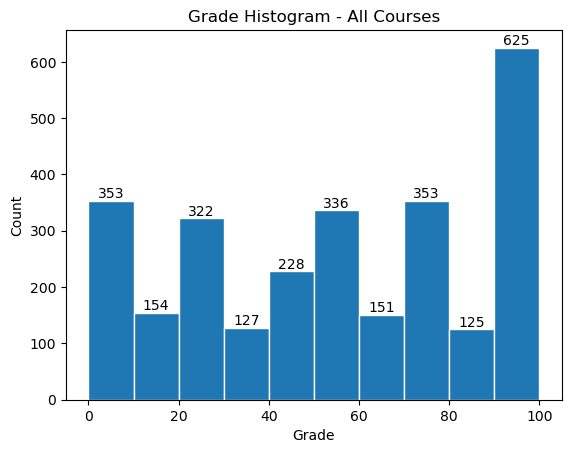

In [91]:
val, bin, bar = plt.hist(df_grades["grade"], label="Inline label", ec="white")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.title("Grade Histogram - All Courses")
plt.bar_label(bar, fontsize=10, c="black")

In [92]:
df_grades[df_grades["user"]=="e45f938b-9d5c-4838-86ce-0755e3c97053"]

,exam_week,academic_year_1,academic_year_0,module,grade,user
0,12,2016,2015,ca114,40,e45f938b-9d5c-4838-86ce-0755e3c97053
70,6,2016,2015,ca114,20,e45f938b-9d5c-4838-86ce-0755e3c97053
2321,12,2017,2016,ca277,10,e45f938b-9d5c-4838-86ce-0755e3c97053
2580,6,2017,2016,ca278,26,e45f938b-9d5c-4838-86ce-0755e3c97053
2636,12,2017,2016,ca278,67,e45f938b-9d5c-4838-86ce-0755e3c97053


In [93]:
df_grades[df_grades["user"]=="91b06877-f0e0-4af9-bbd4-b20ffa90e36b"]

,exam_week,academic_year_1,academic_year_0,module,grade,user
1,12,2016,2015,ca114,60,91b06877-f0e0-4af9-bbd4-b20ffa90e36b
71,6,2016,2015,ca114,20,91b06877-f0e0-4af9-bbd4-b20ffa90e36b


In [94]:
df_grades[df_grades["user"]=="78cd7f00-c86a-46a4-ab20-040f317a60ca"]

,exam_week,academic_year_1,academic_year_0,module,grade,user
3,12,2016,2015,ca114,100,78cd7f00-c86a-46a4-ab20-040f317a60ca
73,6,2016,2015,ca114,0,78cd7f00-c86a-46a4-ab20-040f317a60ca


In [95]:
df_code_py.iloc[0]["upload"]

'#!/usr/bin/env python\n\na = int(raw_input())\nb = int(raw_input())\n\nprint a + b\n\n\n'

In [96]:
df_code_py["task"].value_counts()[820:825]

preamble-test.py      14
first-and-last.py     14
second-argument.py    12
q5_zzz_101.py         11
ls.py                 11
Name: task, dtype: int64

In [97]:
df_code_py[df_code_py["task"]=="stableford_122.py"].iloc[0]["upload"]

"import sys\n\n# Careful here: return in a finally eats the exception\ndef calc_points(par, net_strokes):\n    try:\n        points = par - int(net_strokes) + 2\n        return (points > 0) * points\n    except ValueError:\n        if net_strokes == 'X':\n            return 0\n        raise\n\ndef print_results(results, maxwidth):\n    if not results:\n        return\n    sorted_results = sorted(results, key=lambda x:x[-1], reverse=True)\n    for (n, p) in sorted_results:\n        print('{:>{:d}s} : {:2d}'.format(n, maxwidth, p))\n\ndef print_disqualified(disqualified, maxwidth):\n    for (n, p) in disqualified:\n        print('{:>{:d}s} : Disqualified'.format(n, maxwidth))\n\ndef main():\n\n    # List of results\n    results = []\n    disqualified = []\n\n    # Grab pars and indices\n    pars = [int(x) for x in sys.stdin.readline().strip().split()]\n    indices = [int(x) for x in sys.stdin.readline().strip().split()]\n\n    # Go through remaining lines    \n    for line in sys.stdin:\

In [98]:
df_code_py[df_code_py["task"]=="stableford_122.py"].iloc[100]["upload"]

'import sys\n\nd = {}\n\ndef longest_name(d):\n  longest = [n for n in d.keys()]\n  biggest = max(longest, key=len)\n  return len(biggest)\n\ndef point_calc(s):\n  if s <= -4:\n      return 6\n  elif s == -3:\n      return 5\n  elif s == -2:\n      return 4\n  elif s == -1:\n      return 3\n  elif s == 0:\n      return 2\n  elif s == 1:\n      return 1\n  else:\n      return 0\n\ndef score_calc(par, index, name, handicap, stroke):\n  h = int(handicap)\n  l = h + 1\n  n = list(range(1, 101))\n  total = 0\n  i = 0\n  while i < len(stroke):\n    try:\n      num = int(stroke[i])\n      if num not in n:\n        total = \'Disqualified\'\n     \n      if h >= 1 and h <=18 and int(index[i]) in range(1, l):\n        net_stroke = num - 1\n        score_to_par = net_stroke - par[i]\n        p = point_calc(score_to_par)\n        total += p\n\n      elif h >= 19 and h <= 36:\n        c = h - 18\n        if int(index[i]) in range(1, c + 1):\n          net_stroke = num - 2\n          score_to_par = 

In [99]:
import tokenize

In [100]:
import io

In [101]:
df_code_py = df_code_py.drop_duplicates(subset=["task", "user", "date"])

In [102]:
tokens = []
token_count = []
line_count = []

for index, row in df_code_py.iterrows():
    temp_tokens = None
    t_dict = []
    temp_lines = 0
    temp_token_count = 0
    empty_lines = 0
    with io.StringIO(row["upload"]) as f:
        line = f.readline
        temp_tokens = tokenize.generate_tokens(line)
        try:
            for token in temp_tokens:
                t_dict.append(token._asdict())
                temp_token_count += 1
                if t_dict[-1]["line"] == "\n" or t_dict[-1]["type"] == 0:
                    empty_lines += 1
        except:
            pass
    tokens.append(t_dict)
    token_count.append(temp_token_count)
    temp_lines = t_dict[-1]["end"][0] - empty_lines
    line_count.append(temp_lines)

In [147]:
df_code_py["date"] = pd.to_datetime(df_code_py["date"]) 

C:\Users\felix\AppData\Local\Temp\ipykernel_8868\3305286083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_code_py["date"] = pd.to_datetime(df_code_py["date"])


In [148]:
df_code_py["hour_submitted"] = df_code_py["date"].dt.hour

C:\Users\felix\AppData\Local\Temp\ipykernel_8868\665244305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_code_py["hour_submitted"] = df_code_py["date"].dt.hour


In [103]:
df_code_py["tokens"] = np.array(tokens, dtype=object)

C:\Users\felix\AppData\Local\Temp\ipykernel_8868\96055891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_code_py["tokens"] = np.array(tokens, dtype=object)


In [104]:
df_code_py["token_count"] = np.array(token_count)

C:\Users\felix\AppData\Local\Temp\ipykernel_8868\2873733347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_code_py["token_count"] = np.array(token_count)


In [105]:
df_code_py["line_count"] = np.array(line_count)

C:\Users\felix\AppData\Local\Temp\ipykernel_8868\4076580069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_code_py["line_count"] = np.array(line_count)


In [149]:
df_code_py

,academic_year_1,task,user,date,academic_year_0,upload,module,correct,tokens,token_count,line_count,token_per_line,hour_submitted
0,2017,add.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 14:11:41,2016,#!/usr/bin/env python\n\na = int(raw_input())\...,ca277,True,"[{'type': 61, 'string': '#!/usr/bin/env python...",30,4,7.500000,14
1,2017,concat-lines.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 14:17:33,2016,#!/usr/bin/env python\n\na = str(raw_input())\...,ca277,True,"[{'type': 61, 'string': '#!/usr/bin/env python...",30,4,7.500000,14
2,2017,goodbye.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 10:15:59,2016,"#!/usr/bin/env python\n\nprint ""Goodbye""\n",ca277,True,"[{'type': 61, 'string': '#!/usr/bin/env python...",7,2,3.500000,10
3,2017,less-than.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 14:14:22,2016,#!/usr/bin/env python\n\na = int(raw_input())\...,ca277,True,"[{'type': 61, 'string': '#!/usr/bin/env python...",30,4,7.500000,14
4,2017,longest-line.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 14:51:28,2016,#!usr/bin/evn python\n\na = raw_input()\nb = r...,ca277,True,"[{'type': 61, 'string': '#!usr/bin/evn python'...",42,7,6.000000,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
591699,2018,ex3-first-long-word.py,df8dd1dd-a7c8-46c0-b89f-ec170a81f08a,2018-08-22 11:52:33,2017,#!/usr/bin/env python\n\nn = 10\nword = raw_in...,ca177,True,"[{'type': 61, 'string': '#!/usr/bin/env python...",36,6,6.000000,11
591700,2018,ex3-first-long-word.py,df8dd1dd-a7c8-46c0-b89f-ec170a81f08a,2018-08-22 12:56:07,2017,#!/usr/bin/env python\n\nn = 10\nword = raw_in...,ca177,True,"[{'type': 61, 'string': '#!/usr/bin/env python...",36,6,6.000000,12
591702,2018,ex3-histogram.py,df8dd1dd-a7c8-46c0-b89f-ec170a81f08a,2018-08-22 12:55:26,2017,#!/usr/bin/env python\n\nch = raw_input()\n\ns...,ca177,False,"[{'type': 61, 'string': '#!/usr/bin/env python...",40,6,6.666667,12
591703,2018,ex3-histogram.py,df8dd1dd-a7c8-46c0-b89f-ec170a81f08a,2018-08-22 12:55:45,2017,#!/usr/bin/env python\n\nch = raw_input()\n\ns...,ca177,True,"[{'type': 61, 'string': '#!/usr/bin/env python...",39,6,6.500000,12


In [107]:
df_code_py["token_per_line"] = df_code_py["token_count"]/df_code_py["line_count"]

C:\Users\felix\AppData\Local\Temp\ipykernel_8868\466031809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_code_py["token_per_line"] = df_code_py["token_count"]/df_code_py["line_count"]


In [130]:
df_code_py = df_code_py[df_code_py["line_count"]!=0]

In [131]:
df_code_py

,academic_year_1,task,user,date,academic_year_0,upload,module,correct,tokens,token_count,line_count,token_per_line
0,2017,add.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 14:11:41,2016,#!/usr/bin/env python\n\na = int(raw_input())\...,ca277,True,"[{'type': 61, 'string': '#!/usr/bin/env python...",30,4,7.500000
1,2017,concat-lines.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 14:17:33,2016,#!/usr/bin/env python\n\na = str(raw_input())\...,ca277,True,"[{'type': 61, 'string': '#!/usr/bin/env python...",30,4,7.500000
2,2017,goodbye.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 10:15:59,2016,"#!/usr/bin/env python\n\nprint ""Goodbye""\n",ca277,True,"[{'type': 61, 'string': '#!/usr/bin/env python...",7,2,3.500000
3,2017,less-than.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 14:14:22,2016,#!/usr/bin/env python\n\na = int(raw_input())\...,ca277,True,"[{'type': 61, 'string': '#!/usr/bin/env python...",30,4,7.500000
4,2017,longest-line.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 14:51:28,2016,#!usr/bin/evn python\n\na = raw_input()\nb = r...,ca277,True,"[{'type': 61, 'string': '#!usr/bin/evn python'...",42,7,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
591699,2018,ex3-first-long-word.py,df8dd1dd-a7c8-46c0-b89f-ec170a81f08a,2018-08-22 11:52:33,2017,#!/usr/bin/env python\n\nn = 10\nword = raw_in...,ca177,True,"[{'type': 61, 'string': '#!/usr/bin/env python...",36,6,6.000000
591700,2018,ex3-first-long-word.py,df8dd1dd-a7c8-46c0-b89f-ec170a81f08a,2018-08-22 12:56:07,2017,#!/usr/bin/env python\n\nn = 10\nword = raw_in...,ca177,True,"[{'type': 61, 'string': '#!/usr/bin/env python...",36,6,6.000000
591702,2018,ex3-histogram.py,df8dd1dd-a7c8-46c0-b89f-ec170a81f08a,2018-08-22 12:55:26,2017,#!/usr/bin/env python\n\nch = raw_input()\n\ns...,ca177,False,"[{'type': 61, 'string': '#!/usr/bin/env python...",40,6,6.666667
591703,2018,ex3-histogram.py,df8dd1dd-a7c8-46c0-b89f-ec170a81f08a,2018-08-22 12:55:45,2017,#!/usr/bin/env python\n\nch = raw_input()\n\ns...,ca177,True,"[{'type': 61, 'string': '#!/usr/bin/env python...",39,6,6.500000


In [132]:
df_code_py.loc[1, "upload"]

'#!/usr/bin/env python\n\na = str(raw_input())\nb = str(raw_input())\n\nprint a + b\n\n\n'

In [133]:
df_code_py.loc[1, "tokens"]

[{'type': 61,
  'string': '#!/usr/bin/env python',
  'start': (1, 0),
  'end': (1, 21),
  'line': '#!/usr/bin/env python\n'},
 {'type': 62,
  'string': '\n',
  'start': (1, 21),
  'end': (1, 22),
  'line': '#!/usr/bin/env python\n'},
 {'type': 62, 'string': '\n', 'start': (2, 0), 'end': (2, 1), 'line': '\n'},
 {'type': 1,
  'string': 'a',
  'start': (3, 0),
  'end': (3, 1),
  'line': 'a = str(raw_input())\n'},
 {'type': 54,
  'string': '=',
  'start': (3, 2),
  'end': (3, 3),
  'line': 'a = str(raw_input())\n'},
 {'type': 1,
  'string': 'str',
  'start': (3, 4),
  'end': (3, 7),
  'line': 'a = str(raw_input())\n'},
 {'type': 54,
  'string': '(',
  'start': (3, 7),
  'end': (3, 8),
  'line': 'a = str(raw_input())\n'},
 {'type': 1,
  'string': 'raw_input',
  'start': (3, 8),
  'end': (3, 17),
  'line': 'a = str(raw_input())\n'},
 {'type': 54,
  'string': '(',
  'start': (3, 17),
  'end': (3, 18),
  'line': 'a = str(raw_input())\n'},
 {'type': 54,
  'string': ')',
  'start': (3, 18),
  'e

In [134]:
str_tokens = []
type_tokens = []
str_count = {}
type_count = {}
for index, row in df_code_py.iterrows():
    for i in row["tokens"]:
        str_tokens.append(i["string"])
        type_tokens.append(tokenize.tok_name[i["type"]])
        if i["string"] not in str_count:
            str_count[i["string"]]=1
        else:
            str_count[i["string"]]+=1
        if tokenize.tok_name[i["type"]] not in type_count:
            type_count[tokenize.tok_name[i["type"]]]=1
        else:
            type_count[tokenize.tok_name[i["type"]]]+=1

In [150]:
df_code_py.to_parquet('df_code_py.gzip')

In [151]:
srt_type = sorted(type_count.items(), key=lambda item: item[1], reverse=True)

In [152]:
srt_str = sorted(str_count.items(), key=lambda item: item[1], reverse=True)

In [153]:
srt_type

[('OP', 16877664),
 ('NAME', 14972705),
 ('NEWLINE', 4986586),
 ('NUMBER', 1909500),
 ('NL', 1896372),
 ('INDENT', 1522495),
 ('DEDENT', 1507413),
 ('STRING', 1254664),
 ('ENDMARKER', 368416),
 ('COMMENT', 232414),
 ('ERRORTOKEN', 5016)]

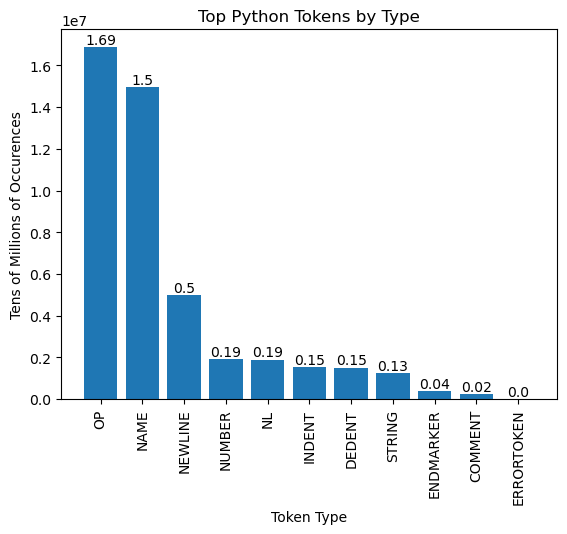

In [154]:
fig, ax = plt.subplots()
p = ax.bar([i[0] for i in srt_type], [i[1] for i in srt_type])
ax.set_title("Top Python Tokens by Type")
ax.set_xlabel("Token Type")
ax.set_ylabel("Tens of Millions of Occurences")
plt.xticks(rotation='vertical')
ax.bar_label(p, labels=[round(i[1]/10000000, 2) for i in srt_type], label_type = "edge")
plt.show()

In [155]:
srt_str[:10]

[('\n', 6104711),
 ('(', 2954003),
 (')', 2950957),
 ('=', 2125259),
 ('', 1995613),
 (':', 1837955),
 ('.', 1672050),
 ('i', 1087501),
 (',', 1073868),
 ('[', 1044302)]

) missing from current font.\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


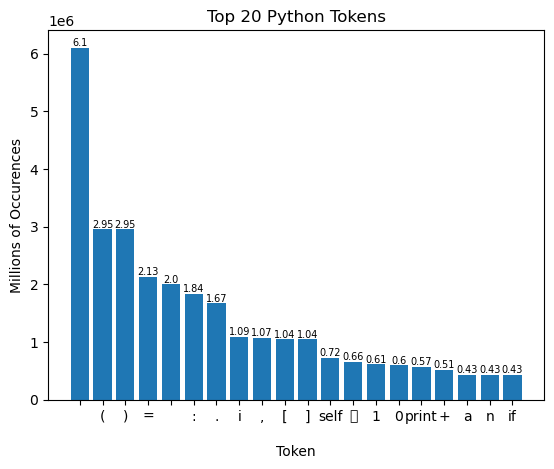

In [156]:
fig, ax = plt.subplots()
p = ax.bar([i[0] for i in srt_str[:20]], [i[1] for i in srt_str[:20]])
ax.set_title("Top 20 Python Tokens")
ax.set_xlabel("Token")
ax.set_ylabel("Millions of Occurences")
ax.bar_label(p, labels=[round(i[1]/1000000, 2) for i in srt_str[:20]], label_type = "edge", fontsize=7)
plt.show()

In [157]:
import sys
!{sys.executable} -m pip install -U ydata-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [158]:
from ydata_profiling import ProfileReport

In [159]:
#df_code_py = pd.read_parquet('df_code_py.gzip')

In [160]:
profile = ProfileReport(df_code_py[df_code_py.columns.difference(["upload", "tokens"])], title="Python Code Upload Profile")

In [161]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]